## import

In [1]:
import itstgcn 
import torch
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
class Eval_csy:
    def __init__(self,learner,train_dataset):
        self.learner = learner
        # self.learner.model.eval()
        try:self.learner.model.eval()
        except:pass
        self.train_dataset = train_dataset
        self.lags = self.learner.lags
        rslt_tr = self.learner(self.train_dataset) 
        self.X_tr = rslt_tr['X']
        self.y_tr = rslt_tr['y']
        self.f_tr = torch.concat([self.train_dataset[0].x.T,self.y_tr],axis=0).float()
        self.yhat_tr = rslt_tr['yhat']
        self.fhat_tr = torch.concat([self.train_dataset[0].x.T,self.yhat_tr],axis=0).float()

In [4]:
import pickle
import pandas as pd

In [5]:
def load_data(fname):
    with open(fname, 'rb') as outfile:
        data_dict = pickle.load(outfile)
    return data_dict

def save_data(data_dict,fname):
    with open(fname,'wb') as outfile:
        pickle.dump(data_dict,outfile)

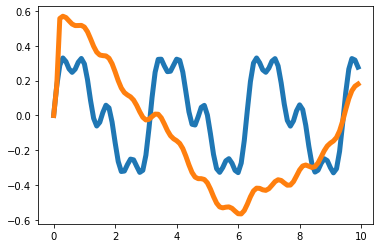

In [53]:
T = 100
t = np.arange(T)/T * 10 

x = 0.3*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.5*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

# _FX1 = np.stack([x,y],axis=1).tolist()
_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
#data_dict = itstgcn.load_data('./data/fivenodes.pkl')

save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

save_data(data1, './data/toy_example_true1.csv')


In [54]:
data_dict1 = itstgcn.load_data('./data/toy_example1.pkl')
loader1 = itstgcn.DatasetLoader(data_dict1)

In [55]:
dataset05031 = loader1.get_dataset(lags=4)

In [56]:
mindex05031 = itstgcn.rand_mindex(dataset05031,mrate=0)
dataset_miss05031 = itstgcn.miss(dataset05031,mindex05031,mtype='rand')

In [57]:
dataset_miss05031.edge_index

array([[0],
       [1]])

In [58]:
dataset_padded_cubic05031 = itstgcn.padding(dataset_miss05031,imputation_method='cubic')

In [59]:
dataset_padded_cubic05031.edge_index

array([[0],
       [1]])

`-` 학습

In [60]:
lrnr05031 = itstgcn.StgcnLearner(dataset_padded_cubic05031)

In [61]:
lrnr05031.train_dataset.edge_index

array([[0],
       [1]])

- lags4/0.3/filter16
- lags4/0.38/filter8
- lags8/0.38/filter8

In [62]:
lrnr05031.learn(filters=16,epoch=50)

`-` 모형 평가 및 시각화

In [63]:
df1 = itstgcn.load_data('./data/toy_example_true1.csv')

In [64]:
evtor05031 = Eval_csy(lrnr05031,dataset_padded_cubic05031)

In [65]:
evtor05031.train_dataset.edge_index

array([[0],
       [1]])

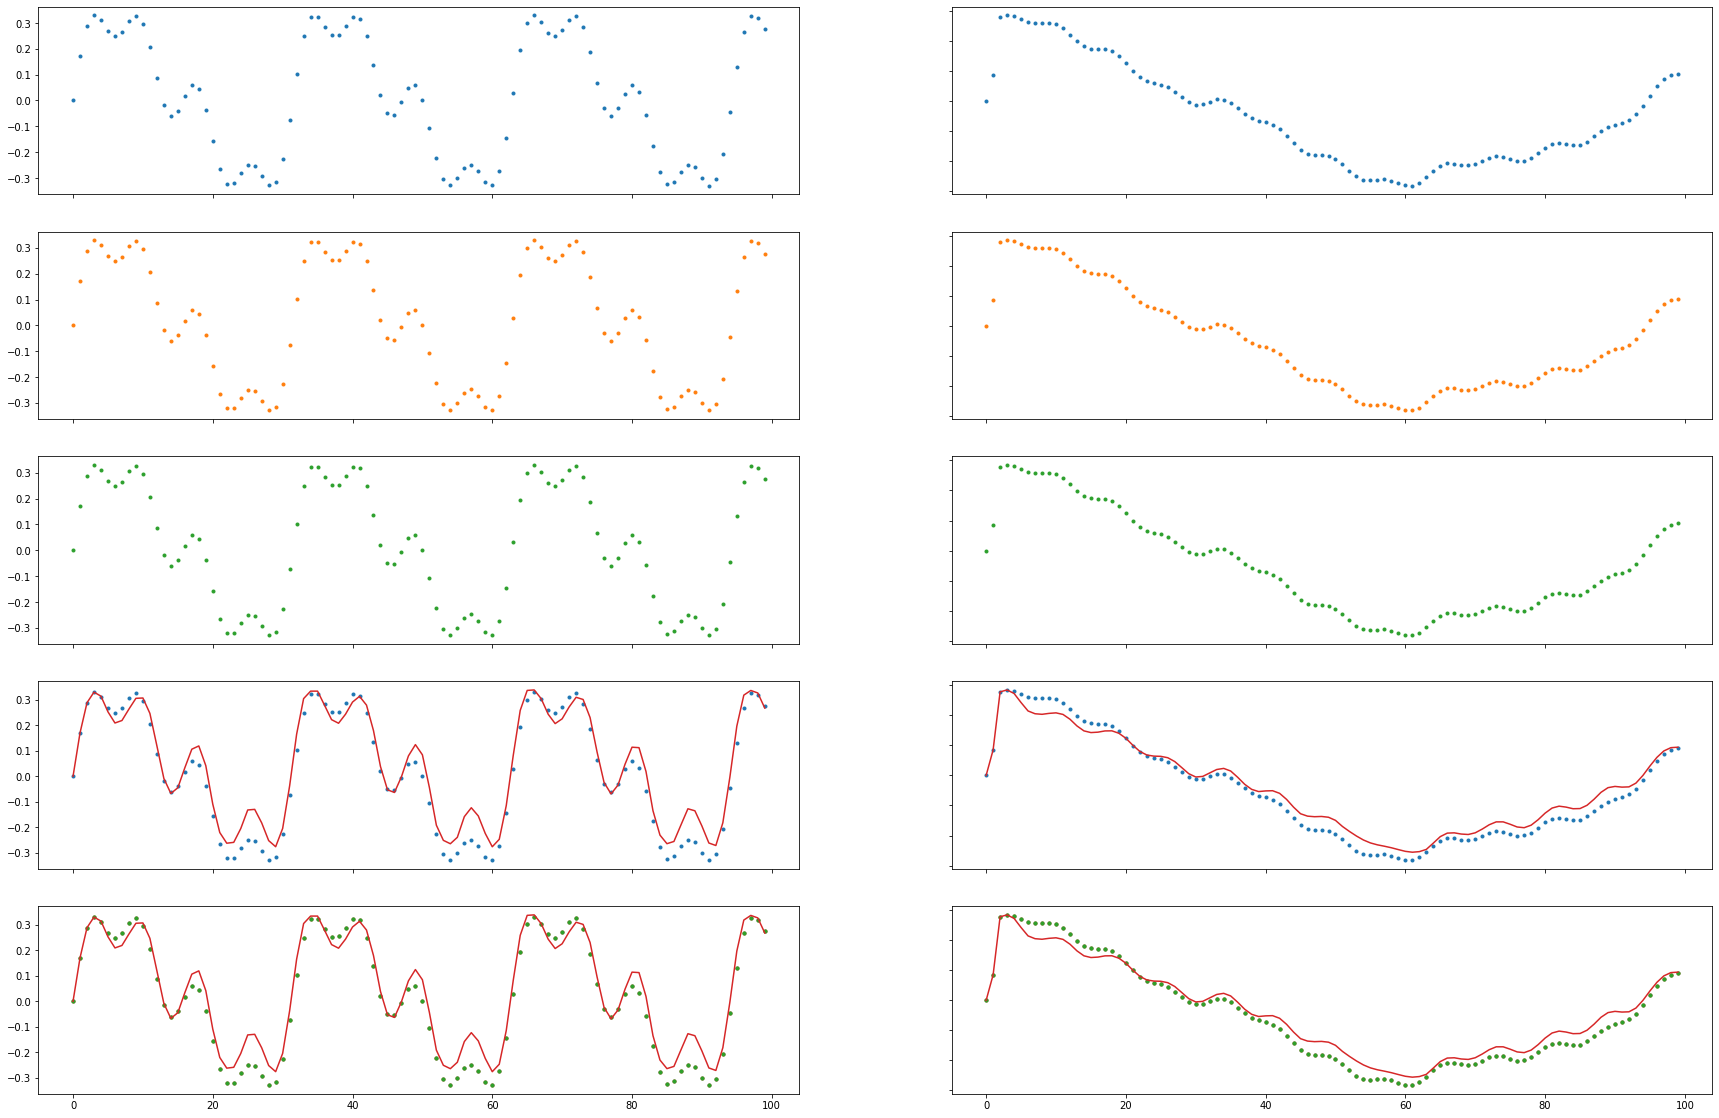

In [66]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2,figsize=(30,20))
# fig.suptitle('Figure 1')
ax1.plot(df1['x'][:],'.',color='C0')
ax2.plot(df1['y'][:],'.',color='C0')
ax3.plot(df1['xer'][:],'.',color='C1')
ax4.plot(df1['yer'][:],'.',color='C1')
ax5.plot(evtor05031.f_tr[:,0],'.',color='C2')
ax6.plot(evtor05031.f_tr[:,1],'.',color='C2')
ax7.plot(df1['x'][:],'.',color='C0')
ax7.plot(evtor05031.fhat_tr[:,0],color='C3')
ax8.plot(df1['y'][:],'.',color='C0')
ax8.plot(evtor05031.fhat_tr[:,1],color='C3')
ax9.plot(df1['x'][:],'.',color='C0')
ax9.plot(df1['xer'][:],'.',color='C1')
ax9.plot(evtor05031.f_tr[:,0],'.',color='C2')
ax9.plot(evtor05031.fhat_tr[:,0],color='C3')
ax10.plot(df1['y'][:],'.',color='C0')
ax10.plot(df1['yer'][:],'.',color='C1')
ax10.plot(evtor05031.f_tr[:,1],'.',color='C2')
ax10.plot(evtor05031.fhat_tr[:,1],color='C3')

for ax in fig.get_axes():
    ax.label_outer()